# Analysis of Different Resolutions for Training with the Polyhedral Ground Truth

First some imports

In [14]:
import os
import os.path

from gravann.input import csv_reader
from gravann.functions import unit_conversion

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ast
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Next, we read all finalized CSV files from the given `input_directory`:

In [15]:
input_directory = Path("./results/pretrain")
output_directory = Path("./results/pretrain")

# Error of interest
error_of_interest = "relRMSE"

df = csv_reader.read_result_csv(
    input_directory,
    include=["results.csv", "pretrain-"],
    exclude=["checkpoint", "validation"],
    files=["results/pretrain/pretrain-3/results_checkpoint_0005.csv"]
)
df_copy = df.copy()

Let's look at the initial result and drop some columns:

In [16]:
df.drop(columns=["low_resolution", "pretrained_model"], inplace=True)
df["resolution"].fillna("10%", inplace=True)
df

,sample,output_folder,run_id,plotting_points,seed,ground_truth,resolution,loss,batch_size,learning_rate,...,RMSE@Altitude_9,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,results/pretrain-2,0,2500,3,polyhedral,1%,normalized_L1_loss,1000,0.0001,...,1.092057e-07,0.000281,0.044486,0.057870,0.298713,0.140157,0.082047,0.089249,0.553457,0.202108
1,churyumov-gerasimenko,results/pretrain-2,1,2500,7,polyhedral,1%,normalized_L1_loss,1000,0.0001,...,1.026348e-07,0.000264,0.043942,0.057231,0.296465,0.140150,0.081270,0.088337,0.562492,0.204065
2,churyumov-gerasimenko,results/pretrain-2,2,2500,9,polyhedral,1%,normalized_L1_loss,1000,0.0001,...,1.111983e-07,0.000286,0.042725,0.054979,0.241055,0.103255,0.077855,0.084495,0.508899,0.174145
3,churyumov-gerasimenko,results/pretrain-2,3,2500,37,polyhedral,1%,normalized_L1_loss,1000,0.0001,...,9.801054e-08,0.000252,0.043464,0.056508,0.304030,0.142836,0.084727,0.092106,0.598275,0.215730
4,churyumov-gerasimenko,results/pretrain-2,4,2500,42,polyhedral,1%,normalized_L1_loss,1000,0.0001,...,1.046739e-07,0.000269,0.044239,0.057566,0.297138,0.139478,0.083441,0.090449,0.570544,0.206565
5,churyumov-gerasimenko,results/pretrain-0,0,2500,3,polyhedral,10%,normalized_L1_loss,1000,0.0001,...,1.786166e-08,0.000046,0.019105,0.024832,0.241627,0.107192,0.036367,0.038903,0.257550,0.095072
6,churyumov-gerasimenko,results/pretrain-0,1,2500,7,polyhedral,10%,normalized_L1_loss,1000,0.0001,...,1.232466e-08,0.000032,0.019837,0.025435,0.259391,0.107969,0.044999,0.047700,0.331481,0.114994
7,churyumov-gerasimenko,results/pretrain-0,2,2500,9,polyhedral,10%,normalized_L1_loss,1000,0.0001,...,9.505759e-09,0.000024,0.020085,0.025819,0.272979,0.113908,0.037234,0.039643,0.245078,0.090434
8,churyumov-gerasimenko,results/pretrain-0,3,2500,37,polyhedral,10%,normalized_L1_loss,1000,0.0001,...,2.534660e-08,0.000065,0.022665,0.029435,0.315277,0.131559,0.036123,0.038609,0.234055,0.089627
9,churyumov-gerasimenko,results/pretrain-0,4,2500,42,polyhedral,10%,normalized_L1_loss,1000,0.0001,...,1.605197e-08,0.000041,0.020509,0.025964,0.208527,0.090902,0.040245,0.043019,0.213172,0.079334


Let's also include the full resolution "normal" training runs:

In [17]:
df_normal = csv_reader.read_result_csv(
    input_directory,
    files=["results/cg/total_results_churyumov-gerasimenko.csv"]
)
df_normal.drop(columns=["low_resolution", "pretrained_model"], inplace=True)
df_normal = df_normal.loc[(df_normal["ground_truth"] == "polyhedral") & (df_normal["sample_domain"] == "[0.0, 1.0]") & (df_normal["noise"] == "['']")]
df_normal["resolution"] = "100%"
df_normal

,sample,output_folder,run_id,plotting_points,seed,ground_truth,loss,batch_size,learning_rate,iterations,...,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude,resolution
0,churyumov-gerasimenko,results/polyhedral-total-seed-1999,0,2500,1999,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.000035,0.026418,0.033961,0.374827,0.165426,0.054045,0.057224,0.391516,0.152814,100%
36,churyumov-gerasimenko,results/polyhedral-total-seed-37,0,2500,37,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.000063,0.021899,0.028447,0.308256,0.128020,0.036427,0.038824,0.239824,0.088991,100%
72,churyumov-gerasimenko,results/polyhedral-total-seed-9,0,2500,9,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.000051,0.021876,0.028137,0.311896,0.130333,0.038743,0.041129,0.269087,0.099688,100%
108,churyumov-gerasimenko,results/polyhedral-total-seed-99,0,2500,99,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.000070,0.020324,0.026135,0.274429,0.117309,0.036974,0.039358,0.231993,0.085643,100%
144,churyumov-gerasimenko,results/polyhedral-total-seed-7,0,2500,7,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.000048,0.019407,0.024835,0.256247,0.112440,0.037953,0.040415,0.285321,0.102580,100%
180,churyumov-gerasimenko,results/polyhedral-total-seed-67,0,2500,67,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.000049,0.021074,0.027006,0.244617,0.110722,0.037289,0.040036,0.223472,0.084616,100%
216,churyumov-gerasimenko,results/polyhedral-total-seed-3,0,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.000039,0.025253,0.032523,0.366622,0.160220,0.051298,0.054216,0.381770,0.146122,100%
252,churyumov-gerasimenko,results/polyhedral-total-seed-433,0,2500,433,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.000041,0.019140,0.024388,0.253776,0.110489,0.037535,0.039852,0.253008,0.093439,100%
324,churyumov-gerasimenko,results/polyhedral-total-seed-42,0,2500,42,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.000026,0.019503,0.025219,0.273049,0.116810,0.036820,0.039136,0.249641,0.092347,100%
360,churyumov-gerasimenko,results/polyhedral-total-seed-2023,0,2500,2023,polyhedral,normalized_L1_loss,1000,0.0001,10000,...,0.000039,0.025771,0.032898,0.357082,0.157833,0.066366,0.070341,0.530961,0.194166,100%


In [18]:
df = pd.concat([df, df_normal], ignore_index=True)
df

,sample,output_folder,run_id,plotting_points,seed,ground_truth,resolution,loss,batch_size,learning_rate,...,RMSE@Altitude_9,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,results/pretrain-2,0,2500,3,polyhedral,1%,normalized_L1_loss,1000,0.0001,...,1.092057e-07,0.000281,0.044486,0.057870,0.298713,0.140157,0.082047,0.089249,0.553457,0.202108
1,churyumov-gerasimenko,results/pretrain-2,1,2500,7,polyhedral,1%,normalized_L1_loss,1000,0.0001,...,1.026348e-07,0.000264,0.043942,0.057231,0.296465,0.140150,0.081270,0.088337,0.562492,0.204065
2,churyumov-gerasimenko,results/pretrain-2,2,2500,9,polyhedral,1%,normalized_L1_loss,1000,0.0001,...,1.111983e-07,0.000286,0.042725,0.054979,0.241055,0.103255,0.077855,0.084495,0.508899,0.174145
3,churyumov-gerasimenko,results/pretrain-2,3,2500,37,polyhedral,1%,normalized_L1_loss,1000,0.0001,...,9.801054e-08,0.000252,0.043464,0.056508,0.304030,0.142836,0.084727,0.092106,0.598275,0.215730
4,churyumov-gerasimenko,results/pretrain-2,4,2500,42,polyhedral,1%,normalized_L1_loss,1000,0.0001,...,1.046739e-07,0.000269,0.044239,0.057566,0.297138,0.139478,0.083441,0.090449,0.570544,0.206565
5,churyumov-gerasimenko,results/pretrain-0,0,2500,3,polyhedral,10%,normalized_L1_loss,1000,0.0001,...,1.786166e-08,0.000046,0.019105,0.024832,0.241627,0.107192,0.036367,0.038903,0.257550,0.095072
6,churyumov-gerasimenko,results/pretrain-0,1,2500,7,polyhedral,10%,normalized_L1_loss,1000,0.0001,...,1.232466e-08,0.000032,0.019837,0.025435,0.259391,0.107969,0.044999,0.047700,0.331481,0.114994
7,churyumov-gerasimenko,results/pretrain-0,2,2500,9,polyhedral,10%,normalized_L1_loss,1000,0.0001,...,9.505759e-09,0.000024,0.020085,0.025819,0.272979,0.113908,0.037234,0.039643,0.245078,0.090434
8,churyumov-gerasimenko,results/pretrain-0,3,2500,37,polyhedral,10%,normalized_L1_loss,1000,0.0001,...,2.534660e-08,0.000065,0.022665,0.029435,0.315277,0.131559,0.036123,0.038609,0.234055,0.089627
9,churyumov-gerasimenko,results/pretrain-0,4,2500,42,polyhedral,10%,normalized_L1_loss,1000,0.0001,...,1.605197e-08,0.000041,0.020509,0.025964,0.208527,0.090902,0.040245,0.043019,0.213172,0.079334


In [19]:
df.to_csv(os.path.join(output_directory, "total_results_resolution_churyumov-gerasimenko.csv"), index=False)

# Processing and Data Visualization

First, we drop every uninteresting parameter and focus on the selected error. Further, we remember the used altitudes for validation.

In [20]:
interesting_columns = ["resolution", "sample" ,"sample_domain"]
interesting_columns.extend([col for col in df if col.startswith(error_of_interest)])
interesting_columns = [x for x in interesting_columns if "@High Altitude" not in x and "@Low Altitude" not in x]


df = df[interesting_columns]
df

,resolution,sample,sample_domain,relRMSE@Altitude_0,relRMSE@Altitude_1,relRMSE@Altitude_2,relRMSE@Altitude_3,relRMSE@Altitude_4,relRMSE@Altitude_5,relRMSE@Altitude_6,relRMSE@Altitude_7,relRMSE@Altitude_8,relRMSE@Altitude_9
0,1%,churyumov-gerasimenko,"[0.0, 1.0]",0.137698,0.132887,0.127930,0.060515,0.044532,0.016705,0.009814,0.002520,0.001305,0.000281
1,1%,churyumov-gerasimenko,"[0.0, 1.0]",0.145273,0.186905,0.099521,0.058737,0.044344,0.015834,0.009285,0.002385,0.001250,0.000264
2,1%,churyumov-gerasimenko,"[0.0, 1.0]",0.119632,0.116724,0.090496,0.057702,0.044287,0.016631,0.009979,0.002499,0.001341,0.000286
3,1%,churyumov-gerasimenko,"[0.0, 1.0]",0.341392,0.177878,0.097928,0.055457,0.042004,0.015626,0.008984,0.002248,0.001202,0.000252
4,1%,churyumov-gerasimenko,"[0.0, 1.0]",0.179752,0.125068,0.108827,0.061106,0.044761,0.016475,0.009629,0.002340,0.001265,0.000269
5,10%,churyumov-gerasimenko,"[0.0, 1.0]",0.107869,0.053960,0.046373,0.013799,0.008969,0.003086,0.001750,0.000417,0.000221,0.000046
6,10%,churyumov-gerasimenko,"[0.0, 1.0]",0.126482,0.068236,0.062645,0.016094,0.009979,0.002499,0.001615,0.000287,0.000151,0.000032
7,10%,churyumov-gerasimenko,"[0.0, 1.0]",0.212800,0.106819,0.047222,0.014620,0.008513,0.002109,0.001044,0.000231,0.000117,0.000024
8,10%,churyumov-gerasimenko,"[0.0, 1.0]",0.098154,0.065153,0.044265,0.013636,0.008535,0.003213,0.002118,0.000553,0.000304,0.000065
9,10%,churyumov-gerasimenko,"[0.0, 1.0]",0.084546,0.074378,0.052032,0.018495,0.010507,0.006365,0.004670,0.000405,0.000198,0.000041


In [21]:
ALTITUDES = ast.literal_eval(df_copy.at[0, "validation_sampling_altitudes"])
print(ALTITUDES)
print(unit_conversion.convert_altitude("churyumov-gerasimenko", np.array([1.0, 3.0, 5.0]), unit='km'))

[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]
[ 3.12660645  9.37981934 15.63303223]


Time to replace the altitudes and make them more readable:

In [22]:
unit_conversion.convert_pandas_altitudes(df, ALTITUDES, convert_height=False, only_height=True)

,resolution,sample,sample_domain,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0
0,1%,churyumov-gerasimenko,"[0.0, 1.0]",0.137698,0.132887,0.127930,0.060515,0.044532,0.016705,0.009814,0.002520,0.001305,0.000281
1,1%,churyumov-gerasimenko,"[0.0, 1.0]",0.145273,0.186905,0.099521,0.058737,0.044344,0.015834,0.009285,0.002385,0.001250,0.000264
2,1%,churyumov-gerasimenko,"[0.0, 1.0]",0.119632,0.116724,0.090496,0.057702,0.044287,0.016631,0.009979,0.002499,0.001341,0.000286
3,1%,churyumov-gerasimenko,"[0.0, 1.0]",0.341392,0.177878,0.097928,0.055457,0.042004,0.015626,0.008984,0.002248,0.001202,0.000252
4,1%,churyumov-gerasimenko,"[0.0, 1.0]",0.179752,0.125068,0.108827,0.061106,0.044761,0.016475,0.009629,0.002340,0.001265,0.000269
5,10%,churyumov-gerasimenko,"[0.0, 1.0]",0.107869,0.053960,0.046373,0.013799,0.008969,0.003086,0.001750,0.000417,0.000221,0.000046
6,10%,churyumov-gerasimenko,"[0.0, 1.0]",0.126482,0.068236,0.062645,0.016094,0.009979,0.002499,0.001615,0.000287,0.000151,0.000032
7,10%,churyumov-gerasimenko,"[0.0, 1.0]",0.212800,0.106819,0.047222,0.014620,0.008513,0.002109,0.001044,0.000231,0.000117,0.000024
8,10%,churyumov-gerasimenko,"[0.0, 1.0]",0.098154,0.065153,0.044265,0.013636,0.008535,0.003213,0.002118,0.000553,0.000304,0.000065
9,10%,churyumov-gerasimenko,"[0.0, 1.0]",0.084546,0.074378,0.052032,0.018495,0.010507,0.006365,0.004670,0.000405,0.000198,0.000041


In [23]:
unit_conversion.convert_altitude("churyumov-gerasimenko", np.array(ALTITUDES), unit='m')

array([3.12660645e+00, 1.56330322e+01, 3.12660645e+01, 1.56330322e+02,
       3.12660645e+02, 1.56330322e+03, 3.12660645e+03, 1.56330322e+04,
       3.12660645e+04, 1.56330322e+05])

In [24]:
df.drop(columns=["sample"], inplace=True)
df.groupby(["resolution"]).mean()

,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0
resolution,,,,,,,,,,
0.1%,0.534783,0.488859,0.484496,0.405719,0.340858,0.103816,0.063205,0.016290,0.008525,0.001785
1%,0.180714,0.146688,0.110807,0.059201,0.044341,0.016520,0.009707,0.002430,0.001295,0.000274
10%,0.291211,0.076574,0.055575,0.015351,0.009421,0.003434,0.002148,0.000426,0.000223,0.000047
100%,0.279522,0.081753,0.057190,0.015144,0.009157,0.003237,0.002038,0.000411,0.000219,0.000046


Time for plotting. First make the DataFrame wide

In [25]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = df.melt(["resolution"], str_altitudes, var_name="distance", value_name=error_of_interest)

dfm["distance"] = dfm["distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))
dfm

,resolution,distance,relRMSE
0,1%,0.001,0.137698
1,1%,0.001,0.145273
2,1%,0.001,0.119632
3,1%,0.001,0.341392
4,1%,0.001,0.179752
...,...,...,...
355,100%,50.000,0.000049
356,100%,50.000,0.000039
357,100%,50.000,0.000041
358,100%,50.000,0.000026


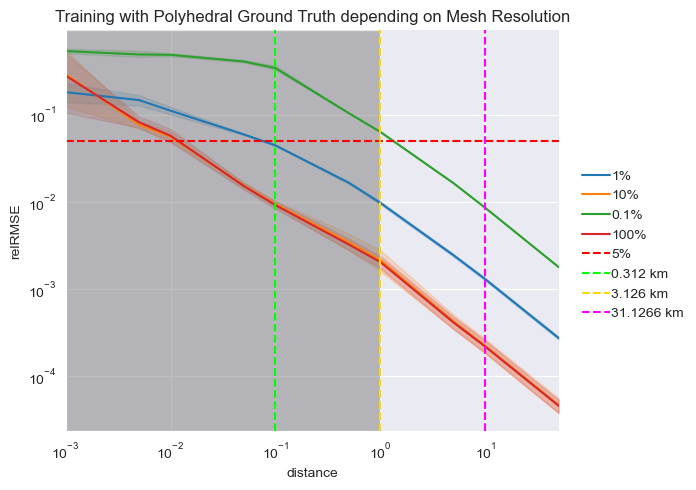

In [29]:
g = sns.relplot(
    data=dfm, kind="line",
    x="distance", y=error_of_interest,
    hue="resolution"
)
g.set(xlim=(0.001, 50.0), xscale='log', #yscale='log',
      title="Training with Polyhedral Ground Truth depending on Mesh Resolution")
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.1, ls='--', c='lime', label="0.312 km")
g.map(plt.axvline, x=1.0, ls='--', c='gold', label="3.126 km")
g.map(plt.axvline, x=10.0, ls='--', c='fuchsia', label="31.1266 km")

for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)

g.legend.remove()
g.add_legend(handletextpad=0.1)
g.tight_layout()
save_path = os.path.join(output_directory, f"churyumov-gerasimenko_mesh_resolution_comparison_norm_{error_of_interest}_log_line.png")
g.savefig(save_path, dpi=300)